In [ ]:
import pandas as pd
from numpy.linalg import LinAlgError

from pandas.core import datetools
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
data = pd.read_csv('/Users/sheeban/Downloads/Normalized-Data/AAPL.csv', parse_dates=[0, 1, 2, 3])
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

  Unnamed: 0 symbol       date              open      high       low  \
0          0   AAPL 1980-12-12  0.00178890192052  0.001779  0.001809   
1          1   AAPL 1980-12-15  0.00170334580393  0.001687  0.001715   
2          2   AAPL 1980-12-16  0.00157890039072  0.001564  0.001589   
3          3   AAPL 1980-12-17  0.00161001172847  0.001602  0.001628   
4          4   AAPL 1980-12-18  0.00165667873509  0.001648  0.001675   

      close     volume  adj_close  prev_day_diff  50_day_moving_avg  \
0  0.001790  117258400   0.000139       0.000000           0.433984   
1  0.001697   43971200   0.000132      -0.022642           0.422663   
2  0.001572   26432000   0.000122      -0.030191           0.408826   
3  0.001611   21610400   0.000125       0.009435           0.404266   
4  0.001658   18362400   0.000129       0.011321           0.403794   

   10_day_volatility  s&p_index_open  s&p_index_high  s&p_index_low  \
0           0.000000      127.360001      129.979996     127.150002  

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
# dateparse('1962-01')
data = pd.read_csv('/Users/sheeban/Downloads/Normalized-Data/FB.csv', parse_dates=['date'], \
                   index_col=['date'],date_parser=dateparse)
print (data.head())


            Unnamed: 0 symbol      open      high       low     close  \
date                                                                    
2012-05-18           0     FB  0.020657  0.021838  0.018921  0.018783   
2012-05-21           1     FB  0.017945  0.017791  0.016432  0.016720   
2012-05-22           2     FB  0.016020  0.016301  0.015406  0.015231   
2012-05-23           3     FB  0.015411  0.015772  0.015615  0.015722   
2012-05-24           4     FB  0.016187  0.016116  0.015819  0.016228   

               volume  adj_close  prev_day_diff  50_day_moving_avg  \
date                                                                 
2012-05-18  573576400   0.018783       0.000000          38.230000   
2012-05-21  168192700   0.016720      -4.200001          36.129999   
2012-05-22  101786600   0.015231      -3.029999          34.419999   
2012-05-23   73600000   0.015722       1.000000          33.814999   
2012-05-24   50237200   0.016228       1.029999          33.657999  

In [ ]:
# convert to time series.
ts = data['adj_close']
ts.head(10)

date
2012-05-18    0.018783
2012-05-21    0.016720
2012-05-22    0.015231
2012-05-23    0.015722
2012-05-24    0.016228
2012-05-25    0.015678
2012-05-29    0.014170
2012-05-30    0.013850
2012-05-31    0.014543
2012-06-01    0.013619
Name: adj_close, dtype: float64

## INDEXING TS ARRAYS

In [ ]:
data.index

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2016-02-24', '2016-02-25', '2016-02-26', '2016-02-29',
               '2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04',
               '2016-03-07', '2016-03-08'],
              dtype='datetime64[ns]', name='date', length=956, freq=None)

In [ ]:
ts = data['adj_close']
ts.head(10)

date
2012-05-18    0.018783
2012-05-21    0.016720
2012-05-22    0.015231
2012-05-23    0.015722
2012-05-24    0.016228
2012-05-25    0.015678
2012-05-29    0.014170
2012-05-30    0.013850
2012-05-31    0.014543
2012-06-01    0.013619
Name: adj_close, dtype: float64

In [ ]:
ts['2012-05-18']

0.018783068668099999

In [ ]:
from datetime import datetime
ts[datetime(2015, 3, 26)]

0.040784268054100001

## GET RANGE


## Checking For Stationarity

### Plot the time-series

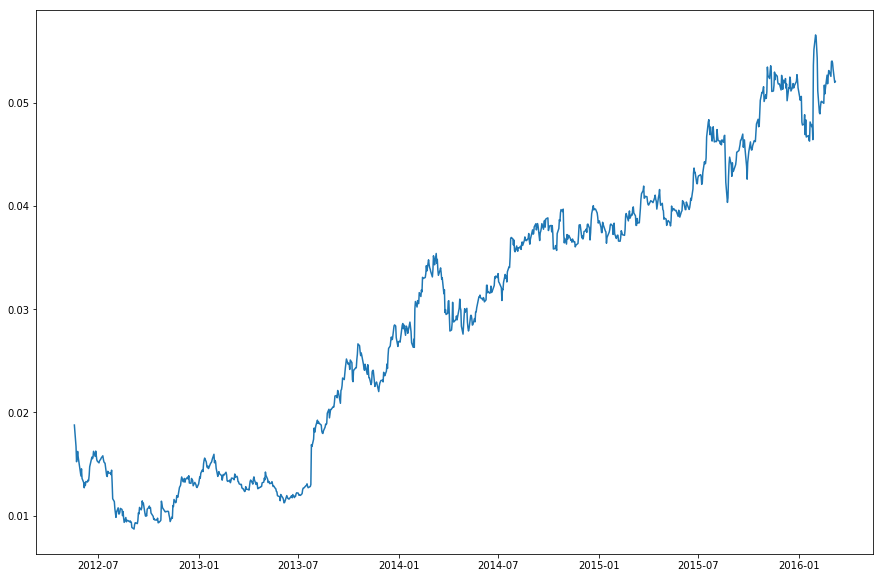

In [ ]:

plt.plot(ts)

#### Function for testing stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determine rolling statistics 
    rolmean =pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index =['Test Statistic', 'p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


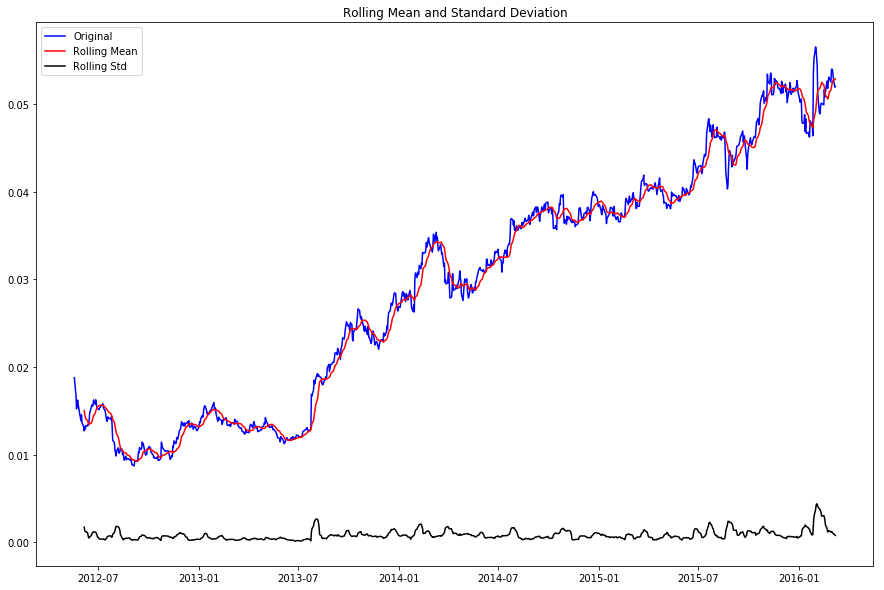

Results of Dickey-Fuller Test:
Test Statistic                  -0.026673
p-value                          0.956270
#Lags Used                       6.000000
Number of Observations Used    949.000000
Critical Value (1%)             -3.437259
Critical Value (5%)             -2.864590
Critical Value (10%)            -2.568394
dtype: float64


In [ ]:
test_stationarity(ts)

# Making TS Stationary

## Estimating & Eliminating Trend

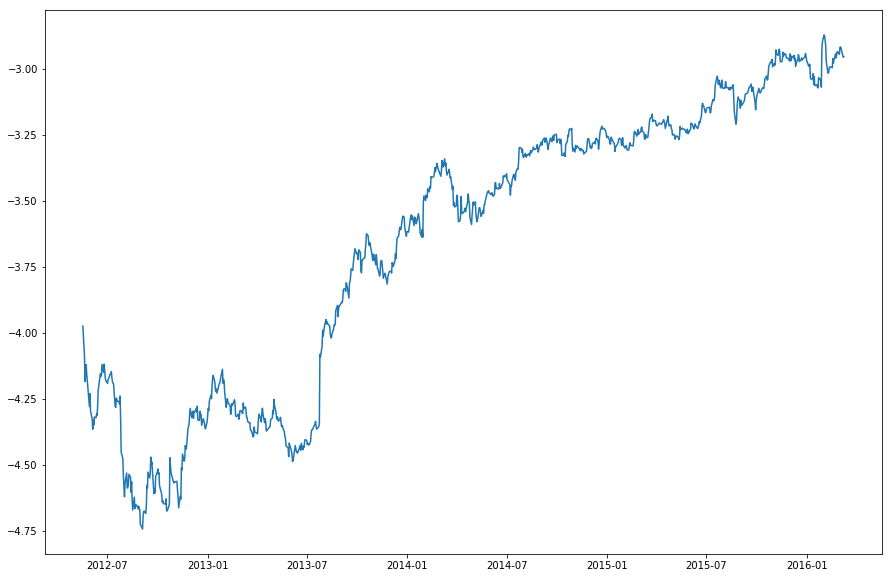

In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing

### Moving Average 

/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


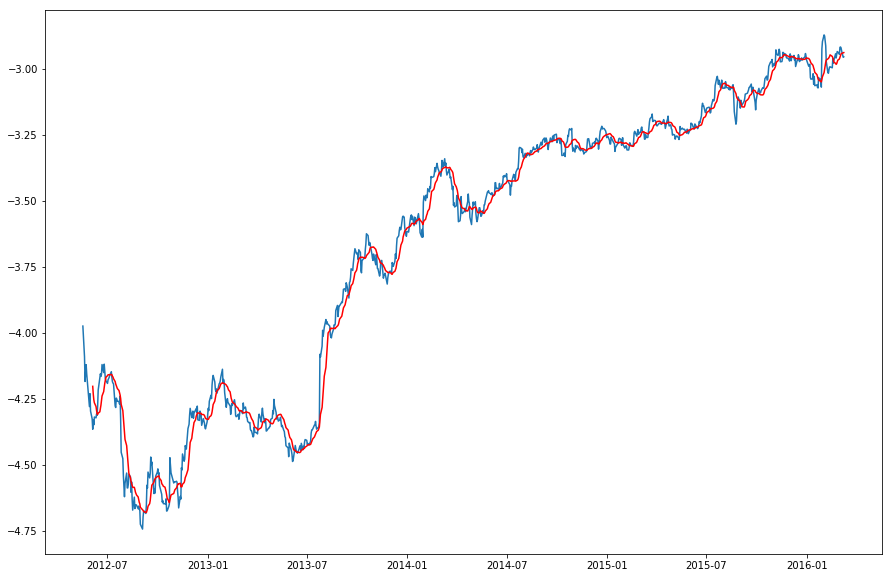

In [ ]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
2012-05-18         NaN
2012-05-21         NaN
2012-05-22         NaN
2012-05-23         NaN
2012-05-24         NaN
2012-05-25         NaN
2012-05-29         NaN
2012-05-30         NaN
2012-05-31         NaN
2012-06-01         NaN
2012-06-04         NaN
2012-06-05   -0.162482
Name: adj_close, dtype: float64

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2012-06-05   -0.162482
2012-06-06   -0.097221
2012-06-07   -0.094605
2012-06-08   -0.053816
2012-06-11   -0.043015
Name: adj_close, dtype: float64

/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


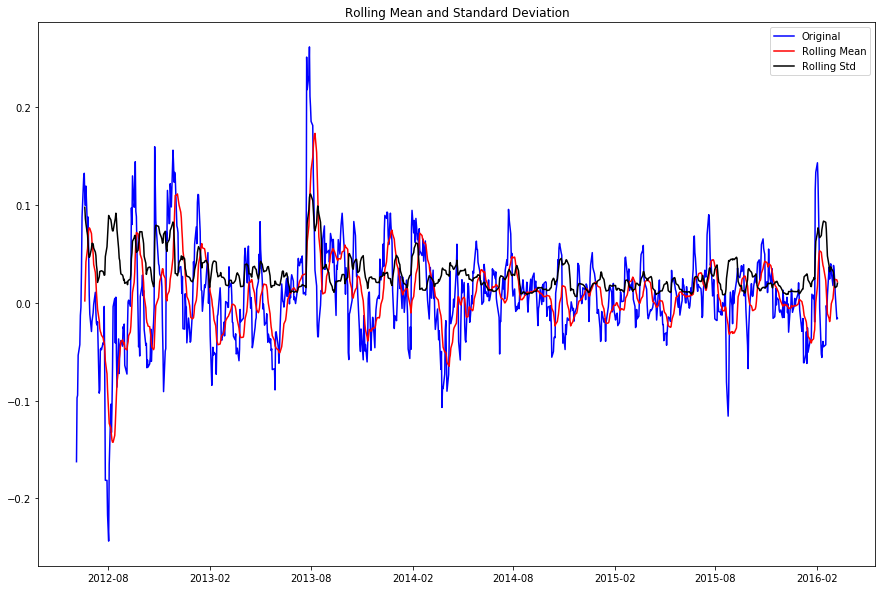

Results of Dickey-Fuller Test:
Test Statistic                -9.059082e+00
p-value                        4.615366e-15
#Lags Used                     5.000000e+00
Number of Observations Used    9.390000e+02
Critical Value (1%)           -3.437333e+00
Critical Value (5%)           -2.864623e+00
Critical Value (10%)          -2.568412e+00
dtype: float64


In [ ]:
test_stationarity(ts_log_moving_avg_diff)

### Exponentially Weighted Moving Average

/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


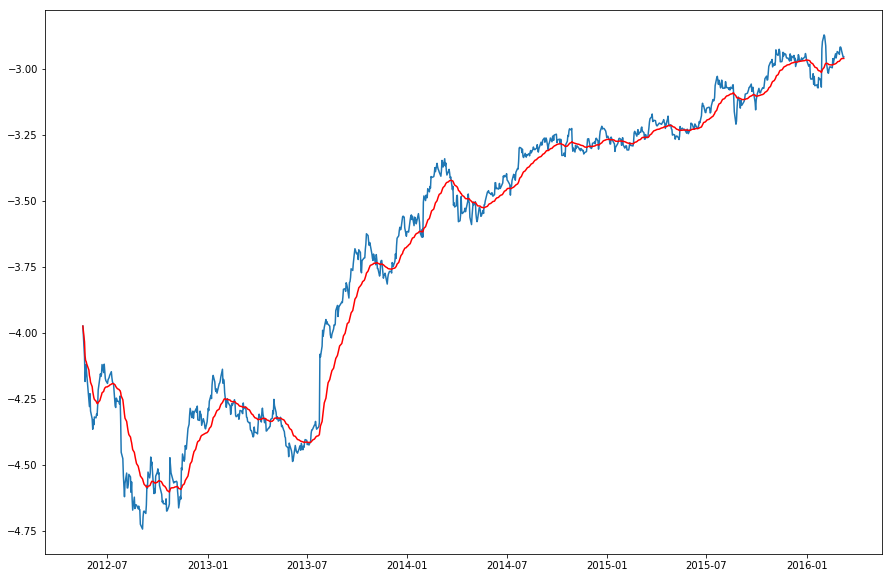

In [ ]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')



/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


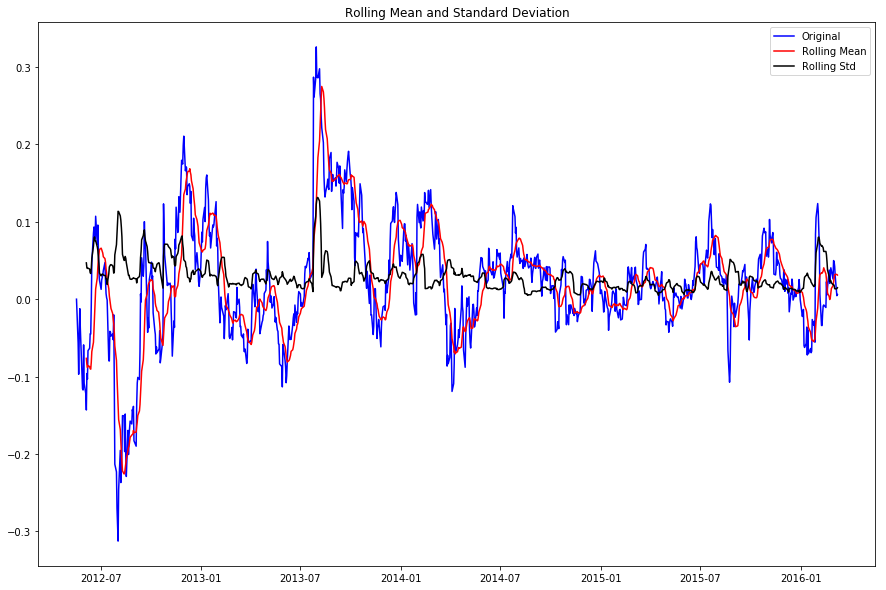

Results of Dickey-Fuller Test:
Test Statistic                  -5.193435
p-value                          0.000009
#Lags Used                       0.000000
Number of Observations Used    955.000000
Critical Value (1%)             -3.437216
Critical Value (5%)             -2.864571
Critical Value (10%)            -2.568384
dtype: float64


In [ ]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


## Eliminating Trend and Seasonality

### Differencing

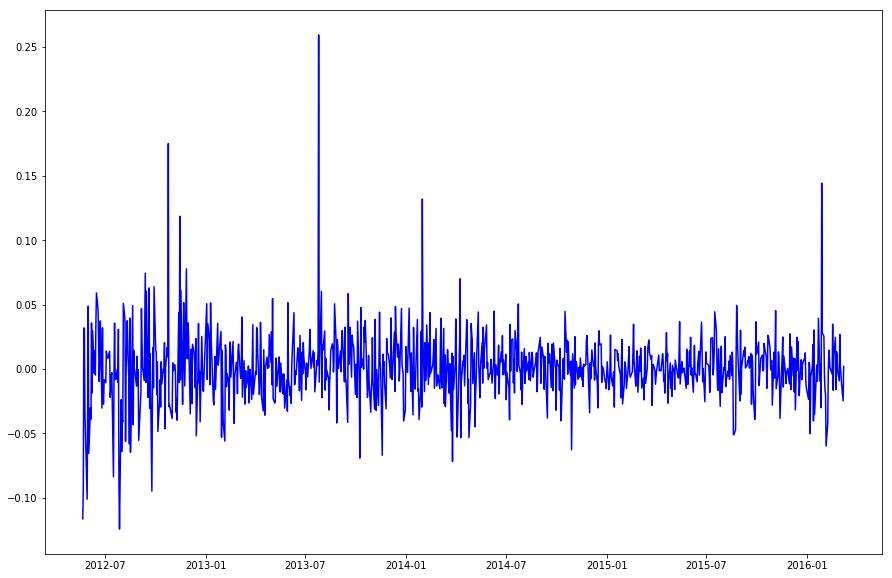

In [ ]:
# Take First Difference
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff, color = 'blue')

/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


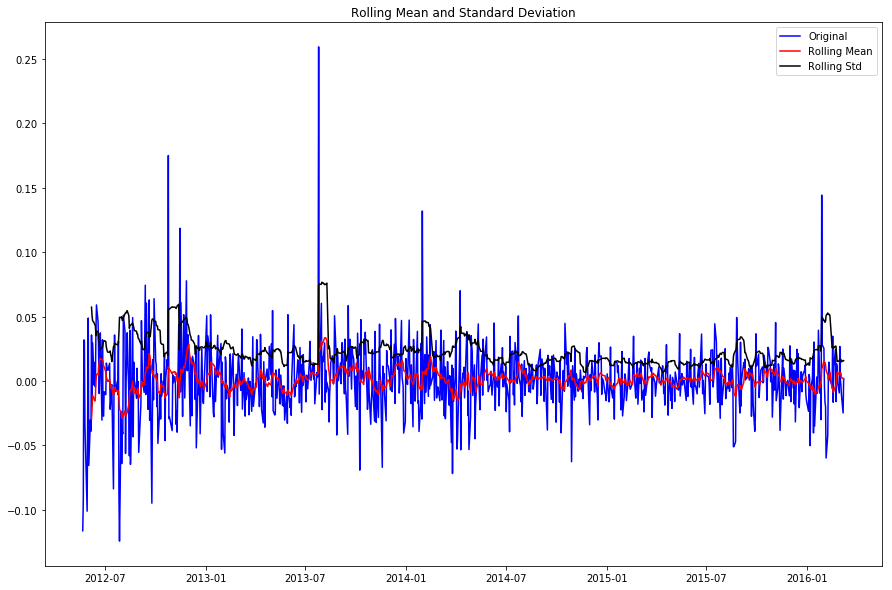

Results of Dickey-Fuller Test:
Test Statistic                 -30.458521
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    954.000000
Critical Value (1%)             -3.437223
Critical Value (5%)             -2.864574
Critical Value (10%)            -2.568386
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)


## DECOMPOSITION

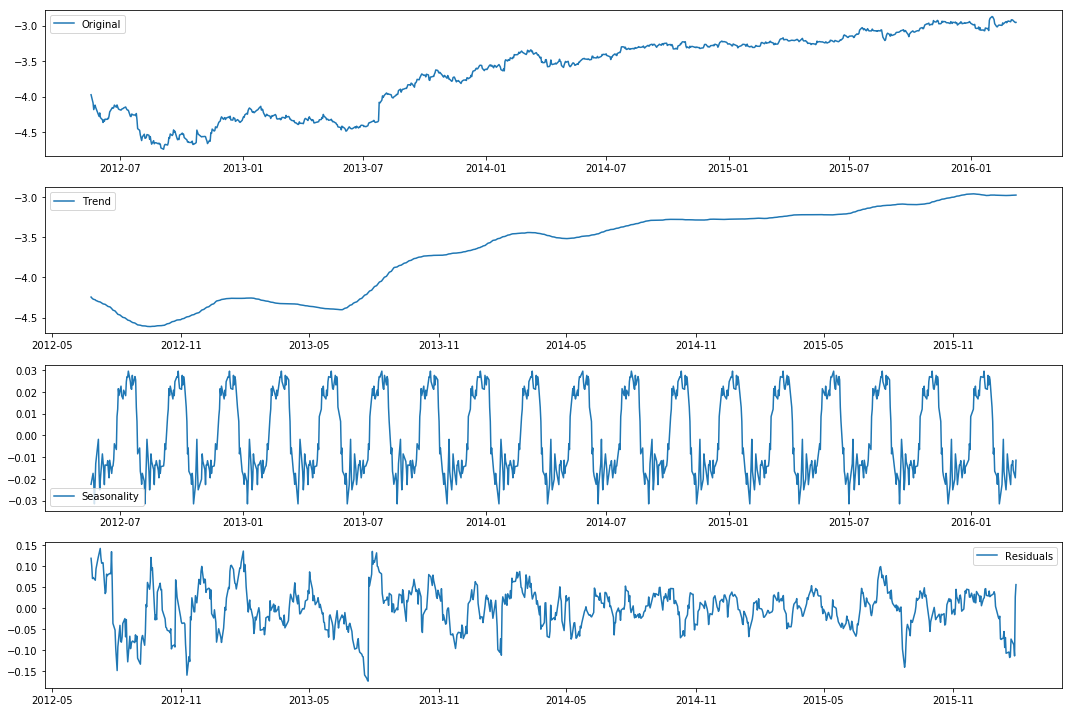

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/Users/sheeban/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


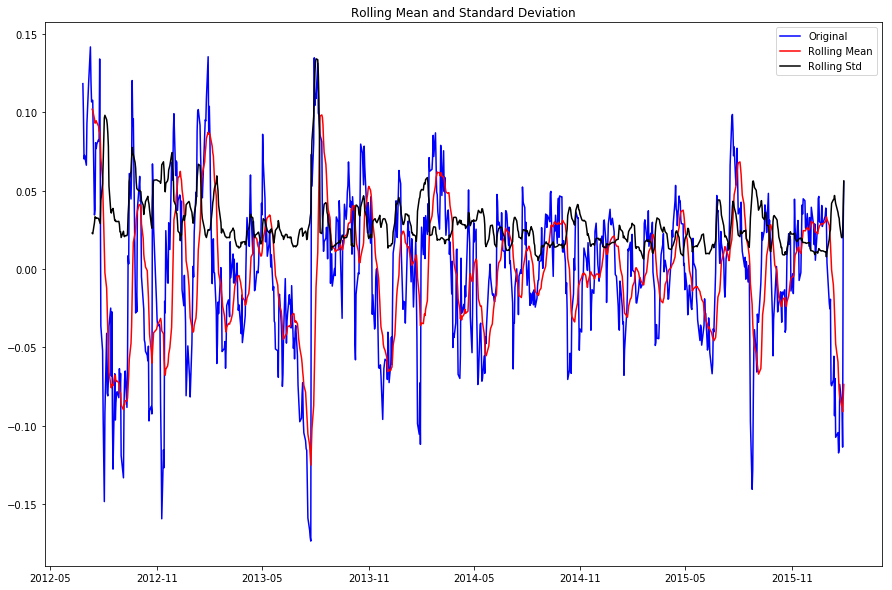

Results of Dickey-Fuller Test:
Test Statistic                -7.820168e+00
p-value                        6.703107e-12
#Lags Used                     7.000000e+00
Number of Observations Used    8.960000e+02
Critical Value (1%)           -3.437669e+00
Critical Value (5%)           -2.864771e+00
Critical Value (10%)          -2.568490e+00
dtype: float64


In [ ]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


### ACF and PACF Plots

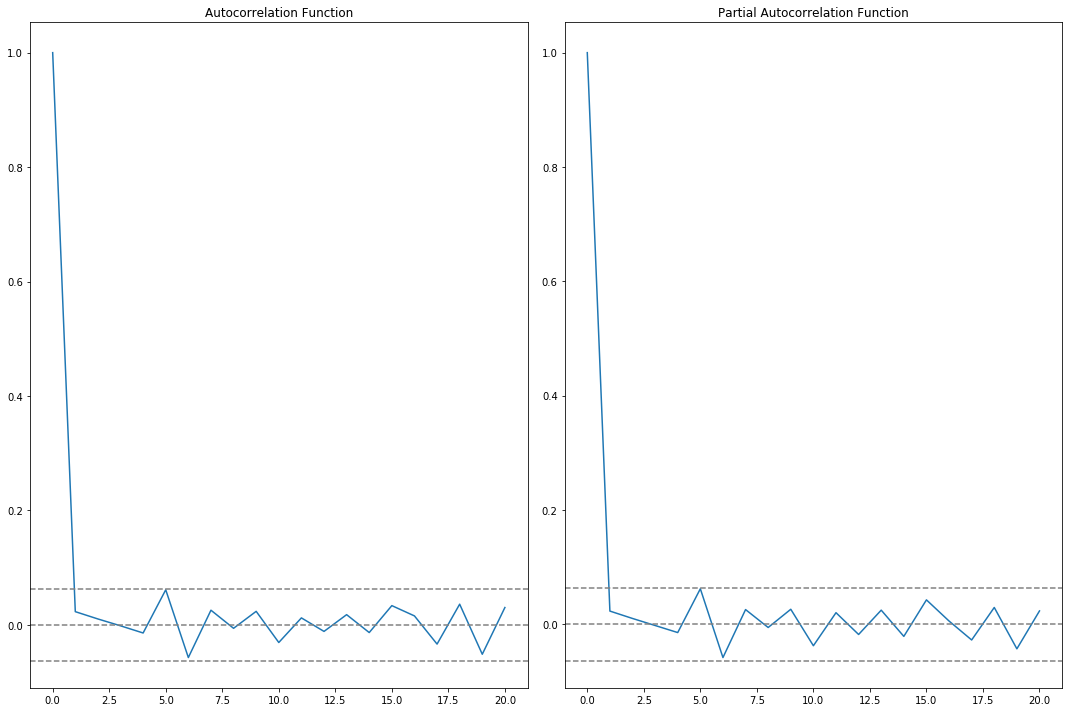

In [ ]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf =pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


# AR MODEL

Text(0.5,1,'RSS: 0.6808')

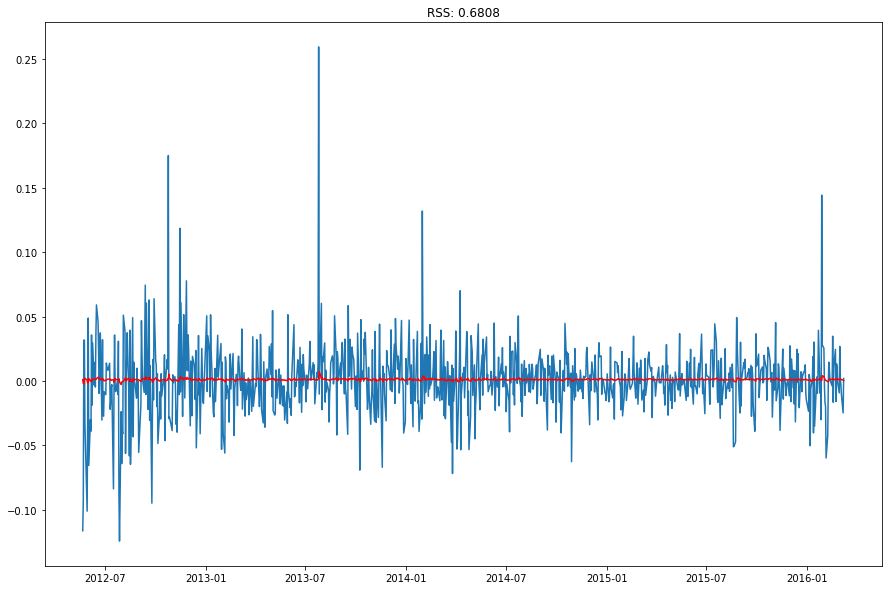

In [ ]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 0.6808')

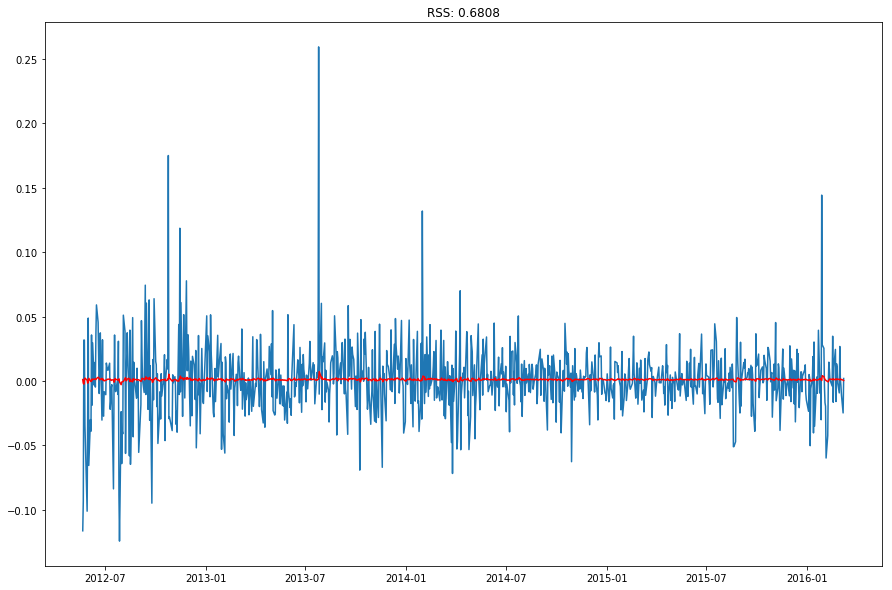

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### Convert to original scale

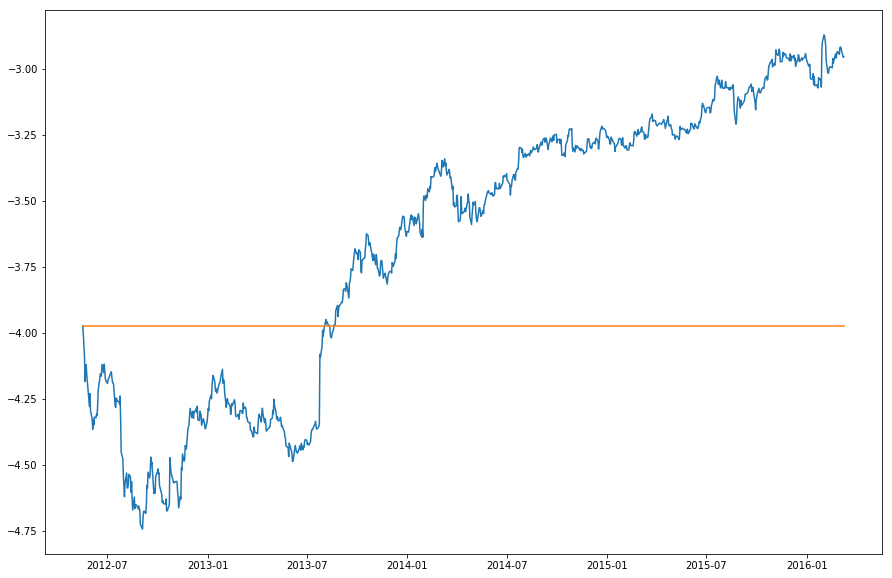

In [ ]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5,1,'RMSE: 0.0172')

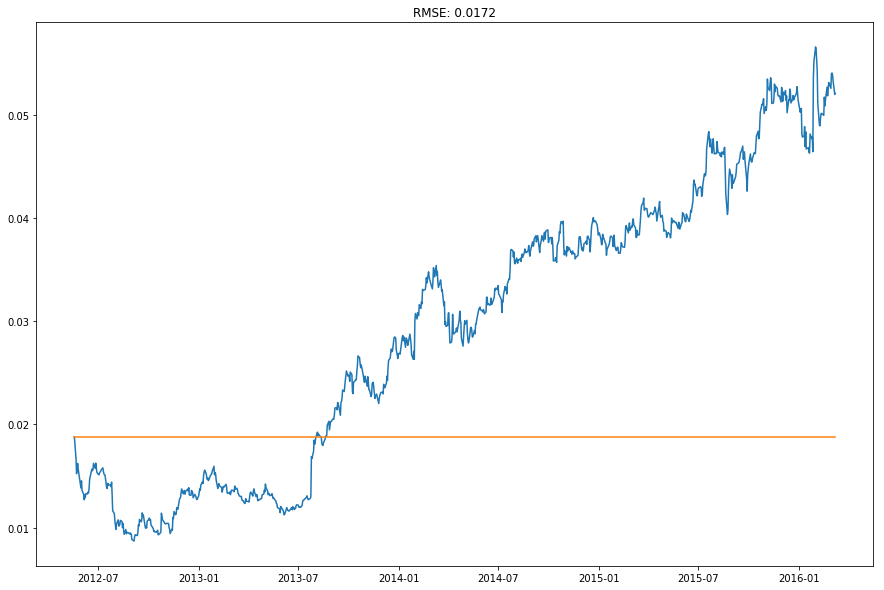

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))